# NetworkX

##Для чего эта библиотека?

[NetworkX](https://networkx.org/documentation/stable/index.html) - Python библиотека для удобной работы с графами и любыми сетевыми структурами. Она умеет:

*   Создавать и генерировать разные виды графов
*   Проводить всяческие манипуляции над ними
*   Анализировать и рисовать их
*   Записывать в разных форматах

 Утверждается, что она отлично работает с большими графами и вообще быстрая, это проверим ниже). Давайте посмотрим, чем же так хороша эта библиотека.

In [ ]:
import networkx as nx

##Объекты

### Вершины

Вспомним, математическое определение графа - совокупность множества вершин и множества рёбер.
В NetworkX тоже самое - любой граф это множество вершин. Вообще, граф это класс вида: dict-of-dict-of-dict.
* Внешний dict (node_dict) содержит информацию о смежных вершинах ('список смежности') для вершины-ключа.
* Следующий словарь (adjlist_dict) представляет информацию о смежности и содержит данные ребра, заданные соседом.
* Внутренний dict (edge_attr_dict) представляет данные ребра и содержит значения атрибутов ребра, заданные именами атрибутов.

Так, в качестве вершины может выступать любой hashable object, в смысле языка Python в плоть до картинки или другого графа. Только None нельзя использовать.

(Вообще структуру графа можно менять: убирать dict, добавлять другой. Почитайте в описании класса Graph)

### Неориентированные графы

nx.Graph() - генерирует неориентированный граф без кратных рёбер, но можно петли.

In [ ]:
G = nx.Graph()

Давайте добавим в него вершин, для этого есть два метода:

* add_node() - добавляем одну вершину

In [ ]:
G.add_node(1)

* add_nodes_from() - добовляем вершины из iterable контейнера, например: list, tuple

In [ ]:
G.add_nodes_from((2, 3))

In [ ]:
list(G.nodes()) # посмотрим на вершины графа

[1, 2, 3]

In [ ]:
H = nx.Graph()
H.add_nodes_from((1, "pickle"))
G.add_nodes_from(H)  # добавляем вершины из графа H в G
list(G.nodes)

[1, 2, 3, 'pickle']

Как удачно: видим, что вершины могут быть разных типов, к тому же повторное добавление вершины было проигнорировано. Как видим, если осмысленно подходить к выбору вершин, библиотека дает возможность удобно обмениваться ими между графами.

In [ ]:
G.clear()

Как и вершины, в граф можно добавлять рёбра, к тому же, если одна из вершин в ребре отсутвует в графе, она добавится:

* add_node() - добавляем одну вершину

In [ ]:
G.add_edge(1, 2)

* add_nodes_from() - добовляем вершины из iterable контейнера, например: list, tuple

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])

In [ ]:
list(G.edges) # посмотрим на ребра графа

[(1, 2), (1, 3)]

In [ ]:
(G.number_of_nodes(), G.number_of_edges())

(3, 2)

In [ ]:
print(list(G.adj[1])) # соседи единицы
print(list(G.degree)) # степени вершин

[2, 3]
[(1, 2), (2, 1), (3, 1)]


Аналогично добавлению работают методы удаления вершин: remove_node(), remove_nodes_from(), remove_edge() и remove_edges_from()

In [ ]:
G.remove_node(2)
print(list(G.nodes))

[1, 3]


При создании графа можно пользоваться конструкторами

In [ ]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)   # граф из ребер edgelist
list(H.edges)

[(0, 1), (1, 2), (2, 3)]

In [ ]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # граф из списка смежности
list(H.edges)

[(0, 1), (0, 2), (1, 2)]

Для обращения к вершинам и ребрам можно использовать как методы nodes, edges, adj так и обращение по ключу, как в словаре.

In [ ]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]      # тоже, что G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [ ]:
G[1][2]

{'color': 'yellow'}

Можно использовать .items(), чтобы извлечь обьекты какого-то словаря

In [ ]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():               # n - вершина | nbrs - соседи вершины
   for nbr, eattr in nbrs.items():           # nbr - сосед | eattr - атрибуты ребра вершина-сосед
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Атрибуты можно добовлять ко всему

In [ ]:
G.clear()
G = nx.Graph(day="Friday")     # атрибут графа
G.graph

{'day': 'Friday'}

In [ ]:
G.add_node(1, time='5pm')
G.add_nodes_from([
    (2, {"time" : '3pm'}),
    (3, {"time" : '3am'})
])
print(list(G.nodes.items()))
G.nodes[1]['room'] = 714
print(G.nodes[1])

[(1, {'time': '5pm'}), (2, {'time': '3pm'}), (3, {'time': '3am'})]
{'time': '5pm', 'room': 714}


C атрибутами ребра тоже самое, но есть ограничение: в атрибуте weight должно лежать числовое значение т.к. он активно используется в разных алгоримах

### Ориентированные графы

Ориентированные графы аналогичны неориентированным. Из нового только пару методов, в остальном с ними можно работать также

Генерируем с помощью nx.DiGraph

In [ ]:
edges_list = [(1, 2), (2, 3)]
G = nx.Graph(edges_list)
DG = nx.DiGraph(G)
list(DG.edges)

[(1, 2), (2, 1), (2, 3), (3, 2)]

In [ ]:
DG.add_edge(4, 3)
list(DG.in_degree)  # количество входящих ребер

[(1, 1), (2, 2), (3, 2), (4, 0)]

In [ ]:
list(DG.out_degree)  # количество исходящих ребер

[(1, 1), (2, 2), (3, 1), (4, 1)]

In [ ]:
list(DG.successors(3)) # соседи в которых ведут ребра из аргумента

[2]

In [ ]:
list(DG.predecessors(3)) # соседи из которых ведут ребра в аргумент

[2, 4]

Всегда можно сделать ориентированный граф неориентированным

In [ ]:
G = DG.to_undirected() # или nx.Graph(DG)
list(G.edges)

[(1, 2), (2, 3), (3, 4)]

### Графы с кратными ребрами

Без них наш инструментарий был бы неполным. Есть два класса MultiGraph и MultiDiGraph - неориентированный и неориентированный. С ними работа ведется точно также, как с их некратными аналогами, просто добавление уже имеющегося ребра не игнорируется

In [ ]:
MG = nx.MultiGraph()
MG.add_edges_from([(1, 2, {"weight" : 0.5}), (1, 2, {"weight" : 0.75}), (2, 3, {"weight" : 0.5})])
MG[1][2]

AtlasView({0: {'weight': 0.5}, 1: {'weight': 0.75}})

##Действия над графами

Добавлять и убирать вершины/ребра конечно занятно, но хочется иметь функции и быстро генерировать интересные виды графов. На эти запросы NetworkX вполне отвечает

In [ ]:
G = nx.Graph([(1, 2), (3, 4)])
J = nx.Graph([(5, 6)])

In [ ]:
list(nx.subgraph(G, [1, 2]).edges) # подграф с вершинами из второго аргумента, можно использовать edge_subgraph

[(1, 2)]

In [ ]:
list(nx.union(G, J).edges) # объединяем графы, но вершины не должны пересекаться

[(1, 2), (3, 4), (5, 6)]

In [ ]:
J = nx.Graph([(1, 3)])
list(nx.compose(G, J).edges) # объединяем графы - аналогично G.add_edges_from(J.edges) только не меняем G

[(1, 2), (1, 3), (3, 4)]

In [ ]:
list(nx.complement(G).edges) # возвращаем дополнение графа до полного

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [ ]:
list(nx.complete_graph(3, nx.DiGraph).edges) # полный граф на n вершинах какого-то вида (из перечисленных выше). тут DiGraph

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]

In [ ]:
list(nx.connected_components(G)) # компоненты связности

[{1, 2}, {3, 4}]

Там есть генераторы и для других графов, но мне они не знакомы(

##Рисование графов

Рисование в библиотеке реализовано на основе matplotlib и GraphViz

In [190]:
import matplotlib.pyplot as plt
!pip install pyghraphviz    # не получилось в колабе

ERROR: Could not find a version that satisfies the requirement pyghraphviz (from versions: none)
ERROR: No matching distribution found for pyghraphviz


Для рисования на основе matplotlib используется функция draw()  и её аналоги.

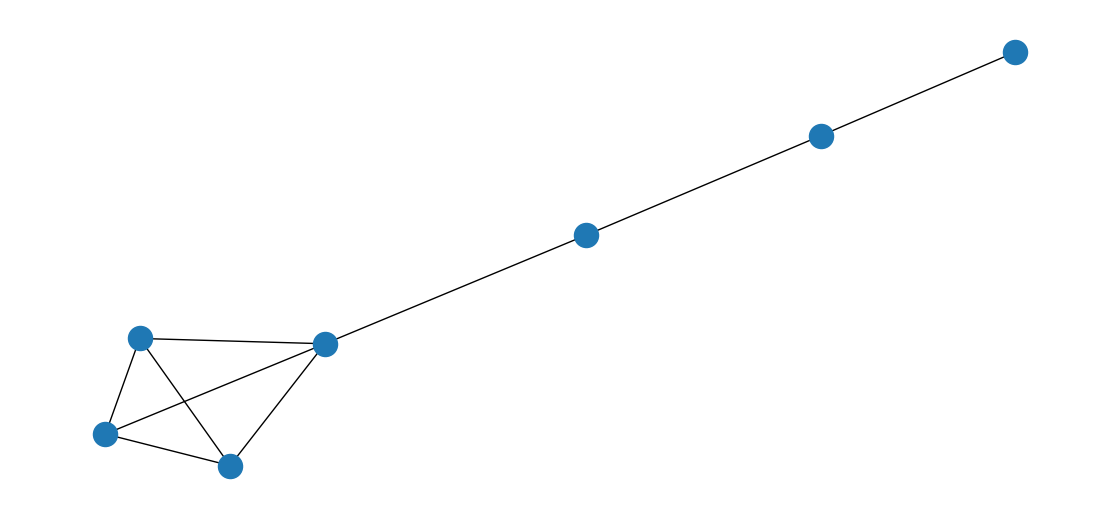

In [164]:
G = nx.lollipop_graph(4, 3)
plt.figure(figsize = (11, 5))
nx.draw(G)

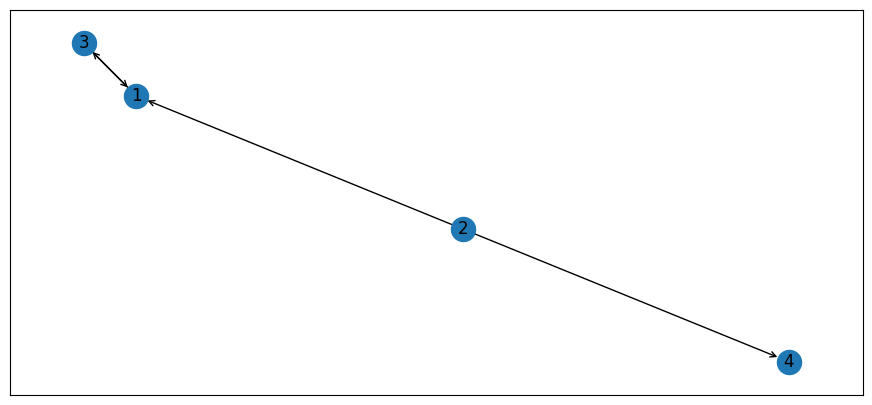

In [172]:
G = nx.DiGraph([(1, 3), (2, 4), (3, 1), (2, 1)])
plt.figure(figsize = (11, 5))
nx.draw_networkx(G, arrowstyle = '->')

{(1, 2): Text(0.7499999806270096, 0.2500000163917703, "{'weight': 0.125}"),
 (1, 3): Text(0.4999999970187798, 0.0, "{'weight': 0.75}"),
 (2, 4): Text(-2.1855693665697608e-08, 0.5000000109278468, "{'weight': 1.2}"),
 (3, 4): Text(-0.749999972680383, -0.2500000382474639, "{'weight': 0.375}")}

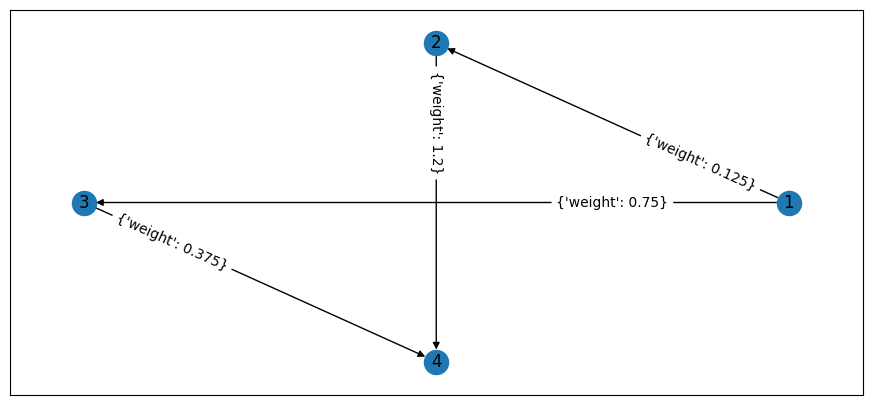

In [206]:
G = nx.DiGraph()
G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
plt.figure(figsize = (11, 5))
nx.draw_networkx(G, pos = nx.circular_layout(G))
nx.draw_networkx_edge_labels(G, nx.circular_layout(G), label_pos = 0.75)

В плане рисования графов библиотека ничего особенного не дает, используя другие библиотеки.

##Скорость

Первый попавшийся алгоритм топологической сортировки

In [218]:
from collections import defaultdict

class Graph:

    def __init__(self,n):

        self.graph = defaultdict(list)

        self.N = n

    def addEdge(self,m,n):

        self.graph[m].append(n)

    def sortUtil(self,n,visited,stack):

        visited[n] = True

        for element in self.graph[n]:

            if visited[element] == False:

                self.sortUtil(element,visited,stack)

        stack.insert(0,n)

    def topologicalSort(self):

        visited = [False]*self.N

        stack =[]

        for element in range(self.N):

            if visited[element] == False:

                self.sortUtil(element,visited,stack)

        return stack


In [223]:
graph = Graph(5)
graph.addEdge(0,1);
graph.addEdge(0,3);
graph.addEdge(1,2);
graph.addEdge(2,3);
graph.addEdge(2,4);
graph.addEdge(3,4);

In [224]:
%%time
graph.topologicalSort()

CPU times: user 23 µs, sys: 3 µs, total: 26 µs
Wall time: 29.8 µs


[0, 1, 2, 3, 4]

Встроенная функция топологической сортировка

In [225]:
G = nx.DiGraph([(0, 1), (0, 3), (1, 2), (2, 3), (2, 4), (3, 4)])

In [226]:
%%time
list(nx.topological_sort(G))

CPU times: user 102 µs, sys: 0 ns, total: 102 µs
Wall time: 107 µs


[0, 1, 2, 3, 4]

Как-то долго если честно, видимо реализация в виде словарей дает о себе знать. Знаю нужно было потестить на больших графах, но не успел(